**Sprint 8 - Proyecto**
Paso 4. Análisis exploratorio de datos (Python)

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv
/datasets/project_sql_result_01.csv. contiene los siguientes datos:

company_name: nombre de la empresa de taxis

trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv
/datasets/project_sql_result_04.csv. contiene los siguientes datos:

dropoff_location_name: barrios de Chicago donde finalizaron los viajes

average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

**Para estos dos datasets ahora necesitas**

- importar los archivos
- estudiar los datos que contienen
- asegurarte de que los tipos de datos sean correctos
- identificar los 10 principales barrios en términos de finalización del recorrido
- hacer gráficos: 
    - empresas de taxis y número de viajes, 
    - los 10 barrios principales por número de finalizaciones
- sacar conclusiones basadas en cada gráfico y explicar los resultados

In [119]:
# Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [175]:
# Crear datasets
company_trips = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv')
company_trips.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [121]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [122]:
# Crear datasets
chicago = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv')
chicago.sample(10)

,dropoff_location_name,average_trips
31,Lower West Side,143.300000
14,Near South Side,839.833333
87,Pullman,3.896552
26,Hyde Park,255.133333
8,Gold Coast,1364.233333
65,Ashburn,16.133333
46,Chinatown,52.433333
64,Oakland,16.633333
0,Loop,10727.466667
93,Riverdale,1.800000


In [123]:
chicago.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


**identificar los 10 principales barrios en términos de finalización del recorrido**

In [137]:
# Top 10 barrios dropoffs
location_grouped = chicago.groupby('dropoff_location_name')['average_trips'].sum().reset_index()
location_top30 = location_grouped.sort_values(by='average_trips', ascending = False).head(30)
location_top10 = location_top30.head(10)
location_top10

,dropoff_location_name,average_trips
50,Loop,10727.466667
68,River North,9523.666667
78,Streeterville,6664.666667
87,West Loop,5163.666667
63,O'Hare,2546.900000
44,Lake View,2420.966667
35,Grant Park,2068.533333
56,Museum Campus,1510.000000
32,Gold Coast,1364.233333
74,Sheffield & DePaul,1259.766667


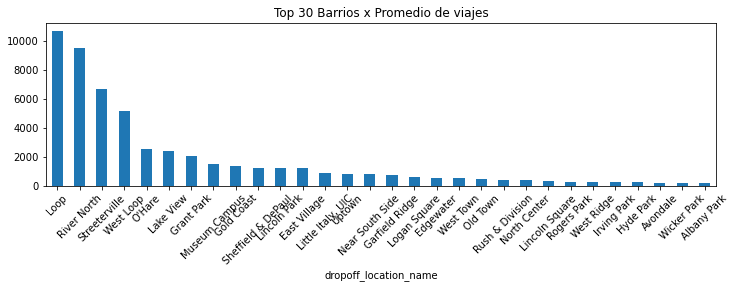

In [143]:
# Gráfico de Barrios x Promedio de viajes
location_top30.plot(
    kind='bar',
    x='dropoff_location_name',
    rot=45, 
    figsize=(12,3),
    legend = False,
    title='Top 30 Barrios x Promedio de viajes')
plt.show()

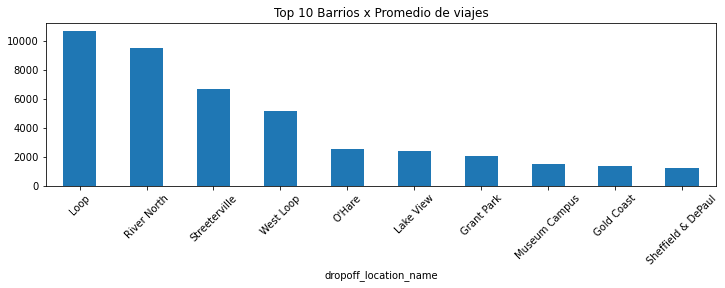

In [162]:
# Gráfico de Barrios x Promedio de viajes
location_top10.plot(
    kind='bar',
    x='dropoff_location_name',
    rot=45, 
    figsize=(12,3),
    legend = False,
    title='Top 10 Barrios x Promedio de viajes')
plt.show()

In [163]:
# Lista de top 10 Barrios
location_top_10_list = location_top10.dropoff_location_name.head(10).to_list()
print("Los 10 Barrios con más viajes de destino son:")
for i, barrio in enumerate(location_top_10_list, start=1):
    print(f"{i}. {barrio}")

Los 10 Barrios con más viajes de destino son:
1. Loop
2. River North
3. Streeterville
4. West Loop
5. O'Hare
6. Lake View
7. Grant Park
8. Museum Campus
9. Gold Coast
10. Sheffield & DePaul


In [164]:
#Sacamos la relación del top 10 con el total de viajes
top10_trips = chicago[chicago.dropoff_location_name.isin(location_top_10_list)]['average_trips'].sum()
total_trips = chicago['average_trips'].sum()
percentage = (top10_trips / total_trips) * 100
print(f'La relación entre el Top 10 y el total de viajes es del {percentage:.2f}%')

La relación entre el Top 10 y el total de viajes es del 76.69%


In [169]:
# Relación top 4
top4_locations = location_top_10_list[0:4]
top4_trips = chicago[chicago.dropoff_location_name.isin(top4_locations)]['average_trips'].sum()
top4_percentage = (top4_trips/total_trips)*100
print(f'La relación del Top 4 es del {top4_percentage:.2f}%')

La relación del Top 4 es del 56.88%


Aunque el total de viajes del Top 10 representa el 76.69% de todos los viajes.
De los 10 barrios con más viajes de destino, podemos destacar los 4 primeros:
- Loop
- River North
- Streeterville
- West Loop

Que son los barrios en que se nota que hay un considerable volumen de viajes destino.
Este top 4 representa el 56.88% de todos los viajes

In [171]:
# Compañías con más viajes
company_grouped = company_trips.groupby('company_name')['trips_amount'].sum().reset_index()
company_top30 = company_grouped.sort_values(by='trips_amount', ascending=False).head(30)
company_top30.head(10)

,company_name,trips_amount
45,Flash Cab,19558
61,Taxi Affiliation Services,11422
50,Medallion Leasin,10367
63,Yellow Cab,9888
60,Taxi Affiliation Service Yellow,9299
36,Chicago Carriage Cab Corp,9181
43,City Service,8448
59,Sun Taxi,7701
58,Star North Management LLC,7455
33,Blue Ribbon Taxi Association Inc.,5953


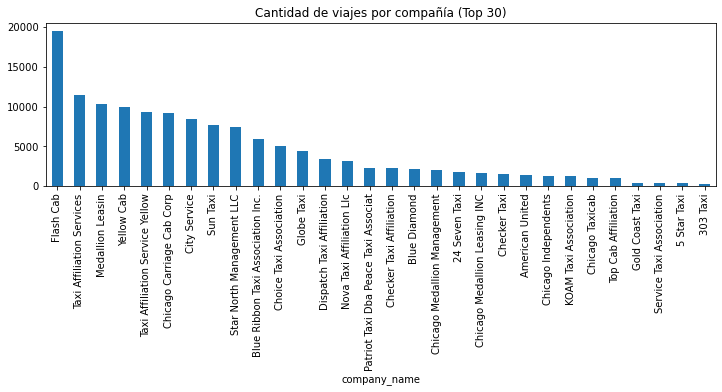

In [172]:
# Gráfico de viajes por compañía de taxis
company_top30.plot(
    kind='bar', 
    x= 'company_name', 
    figsize=(12,3),
    legend = False, 
    title = 'Cantidad de viajes por compañía (Top 30)'
    )
plt.show()

In [187]:
company_top10_list = company_top30.company_name.head(10).to_list()
print("Las compañías top 10, son:")
for i, company in enumerate(company_top10_list, start=1):
    print(f"{i}. {company}")


Las compañías top 10, son:
1. Flash Cab
2. Taxi Affiliation Services
3. Medallion Leasin
4. Yellow Cab
5. Taxi Affiliation Service Yellow
6. Chicago Carriage Cab Corp
7. City Service
8. Sun Taxi
9. Star North Management LLC
10. Blue Ribbon Taxi Association Inc.


In [186]:
flash_cab_trips = company_trips[company_trips['company_name']=='Flash Cab']['trips_amount'].sum()
total_trips = company_trips['trips_amount'].sum()
flash_cab_percentage = (flash_cab_trips / total_trips) * 100
print(f'El porcentaje de trips de Flash Cab equivale al {flash_cab_percentage:.2f}% de todos los viajes.')

El porcentaje de trips de Flash Cab equivale al 14.24% de todos los viajes.


Flash Cab es la compañía de Taxis que domina el mercado con un 14.24% de todos los viajes. Tiene casi el doble de viajes promedio que su siguiente competidor, Taxi Affiliation Services, que tiene un 8.32.
El dominio de Flash Cab tal vez se deba a que tienen un mayor número de unidades circulando así como suscriptores a alguna app.